# 演習1-2

## パターン識別編（その１）

わからない場合や方針が立たない場合は PracticeHint にある同名のファイルを眺めてみてください．

In [1]:
import numpy as np
import matplotlib.pylab as plt

数直線上のデータを２クラスに分類する問題を考える
データは， 0.3 と 0.9 を中心とするガウス分布で生成する

* 0.3 を中心とするデータには ０ のラベル
* 0.9 を中心とするデータには 1 のラベル


In [2]:
# ここらへんのパラメータはいじってく遊んでください

N = 50000     # 点の個数
m1 = 0.3    # クラス１の中心
m2 = 0.9    # クラス２の中心
sgm = 0.15 # ガウス分布の標準偏差

x1 = m1 + sgm * np.random.randn(N//2) # N(x1 | m1, sgm^2)
x2 = m2 + sgm * np.random.randn(N//2) # N(x2 | m2, sgm^2)
y1 = np.repeat(0, N//2)
y2 = np.repeat(1, N//2)

x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

### これで下準備完了
(x, y) にデータが入っている．これのプロットと真の直線の関係を見てみる

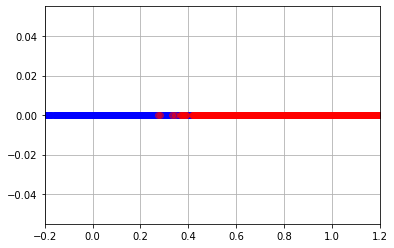

In [3]:
# 数直線上にデータをばらまくとかんな感じ
plt.plot( x[y == 0], np.repeat(0, np.sum(y==0)), 'bo', alpha=0.5) # y == 0 の点を描画
plt.plot( x[y == 1], np.repeat(0, np.sum(y==1)), 'ro', alpha=0.5) # y == 1 の点を描画
plt.xlim(-0.2, 1.2)
plt.grid()

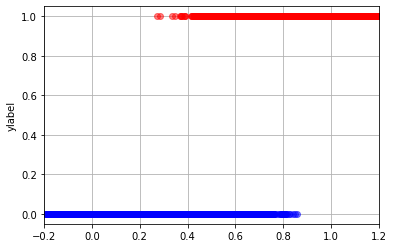

In [4]:
# ｙのラベルを値として図を書くとこんな感じになる
plt.plot(x[y==0], y[y==0], 'bo', alpha=0.5)
plt.plot(x[y==1], y[y==1], 'ro', alpha=0.5)
plt.ylabel('ylabel')
plt.xlim(-0.2, 1.2)
plt.grid()

## 問い: 赤点と青点の境界を決めてクラスを判別することは可能か？

１次元のデータ上でクラス境界を求めます．
データの点群を $\{x_n\}$ とすると， 0 のラベルが付いたクラスと 1 のラベルのついたクラスが，上図のように張り付くので
ロジスティック関数を適当にパラメータを変えつつ貼り付けてフィッティングする．（ロジスティック回帰と呼ばれる）．

ロジスティック関数は下のような関数

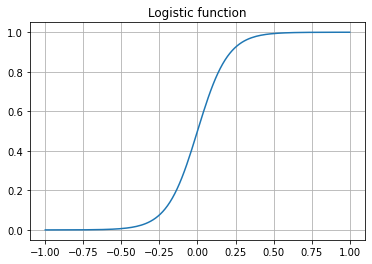

In [5]:
xx = np.linspace(-1, 1, 128)
beta = 10.0
yy = 1 / (1 + np.exp(-beta * xx))
plt.plot(xx, yy)
plt.title('Logistic function')
plt.grid()

ロジスティック関数を上述のデータにフィッティングさせて，クラス 0 か 1 の確信度をロジスティック関数値で記載しようという方法になる．
以下，面倒なので，標準ロジスティック関数を　$\sigma$ として表す．
$$
\sigma(u) = \frac{1}{1+\exp(-u)}
$$
ロジスティック回帰の場合は， 変数の線形和をロジスティック関数にかけることで
推定モデルをつくる．　この場合は $x$ は１変数なので， $f(x; w) = \sigma( w_1 x + w_0)$ とおいて， $w_0$ と $w_1$ を推定することを考える．

さらにロス関数もちょっと特殊になる．

* ラベル$y$ が 0 のときは， $f(x, w)$ も　０ に近い値であってほしい
* ラベル$y$ が 1 のときは， $f(x, w)$ は，1 に近い値であってほしい　→ $1 - f(x, w)$ が　０に近い値であってほしい

ということなので，　$\prod_n f(x_n, w)^{y_n} (1-f(x_n, w)）^{1-y_n}$ ができるだけ大きい値をとればよい．
ただ，このままだと微分とかの操作が厄介なので単調関数の $\log$ をとって，ロス関数の体裁に合わせるために負号をつけることで
$$
    J(w) = - \sum_n y_n \log f(x_n, w) + (1-y_n) \log (1-f(x_n, w))
$$
を使う．この関数は交差エントロピー関数と呼ばれる．
二乗誤差を使ってもよいが性能はでない，理由が知りたい人は質問してください．

あとは線形回帰のときと同じく

## モデル $f(x_n; w)$ のロスが小さくなるように $w$ を求める．

あとは，面倒なので Keras + Tensorflow の解のみを記載する． (sklearn については自分で調べてください，そっちのがはるかに楽です）

## Keras + TensorFlow を用いて答えを求めなさい

演習1と違うところは，ロジスティック関数をかけるために *活性化関数(Activation)* というものを使います．
活性化関数は計算した線形和に変調をかけるための関数です．

* ロジスティック関数は, 活性化関数として 'sigmoid' と呼ばれるタイプのものを選べばOK（のはず）です．
* ロスに関しては 'binary_crossentropy' を選べばOKです．


In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 以下にコードを書いていくこと 
model = Sequential()
model.add(Dense(1,input_shape=(1,),use_bias=True))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

2022-01-26 10:15:33.333632: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/512
500/500 [==============================] - 1s 1ms/step - loss: 0.5575
Epoch 2/512
500/500 [==============================] - 1s 1ms/step - loss: 0.4900
Epoch 3/512
500/500 [==============================] - 0s 990us/step - loss: 0.4359
Epoch 4/512
500/500 [==============================] - 0s 970us/step - loss: 0.3913
Epoch 5/512
500/500 [==============================] - 0s 993us/step - loss: 0.3541
Epoch 6/512
500/500 [==============================] - 0s 977us/step - loss: 0.3225
Epoch 7/512
500/500 [==============================] - 0s 959us/step - loss: 0.2955
Epoch 8/512
500/500 [==============================] - 0s 991us/step - loss: 0.2721
Epoch 9/512
500/500 [==============================] - 0s 980us/step - loss: 0.2517
Epoch 10/512
500/500 [==============================] - 0s 983us/step - loss: 0.2339
Epoch 11/512
500/500 [==============================] - 0s 986us/step - loss: 0.2181
Epoch 12/512
500/500 [==============================] - 1s 1ms/step - loss: 0.

500/500 [==============================] - 0s 970us/step - loss: 0.0615
Epoch 194/512
500/500 [==============================] - 0s 971us/step - loss: 0.0615
Epoch 195/512
500/500 [==============================] - 0s 968us/step - loss: 0.0615
Epoch 196/512
500/500 [==============================] - 0s 971us/step - loss: 0.0615
Epoch 197/512
500/500 [==============================] - 0s 954us/step - loss: 0.0615
Epoch 198/512
500/500 [==============================] - 0s 968us/step - loss: 0.0614
Epoch 199/512
500/500 [==============================] - 0s 975us/step - loss: 0.0614
Epoch 200/512
500/500 [==============================] - 0s 967us/step - loss: 0.0614
Epoch 201/512
500/500 [==============================] - 0s 961us/step - loss: 0.0614
Epoch 202/512
500/500 [==============================] - 0s 962us/step - loss: 0.0614
Epoch 203/512
500/500 [==============================] - 0s 963us/step - loss: 0.0614
Epoch 204/512
500/500 [==============================] - 0s 978us/st

500/500 [==============================] - 1s 1ms/step - loss: 0.0606
Epoch 384/512
500/500 [==============================] - 0s 959us/step - loss: 0.0606
Epoch 385/512
500/500 [==============================] - 0s 963us/step - loss: 0.0606
Epoch 386/512
500/500 [==============================] - 0s 966us/step - loss: 0.0606
Epoch 387/512
500/500 [==============================] - 0s 975us/step - loss: 0.0606
Epoch 388/512
500/500 [==============================] - 1s 1ms/step - loss: 0.0606
Epoch 389/512
500/500 [==============================] - 0s 966us/step - loss: 0.0606
Epoch 390/512
500/500 [==============================] - 0s 989us/step - loss: 0.0606
Epoch 391/512
500/500 [==============================] - 0s 960us/step - loss: 0.0606
Epoch 392/512
500/500 [==============================] - 0s 989us/step - loss: 0.0606
Epoch 393/512
500/500 [==============================] - 0s 961us/step - loss: 0.0606
Epoch 394/512
500/500 [==============================] - 0s 968us/step -

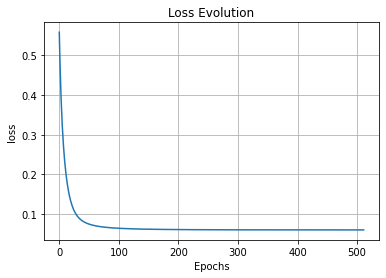

In [7]:
# ロスの値が学習によってどう変わるかを表示してみること
hist = model.fit(x, y, epochs=512, batch_size=100, verbose=1)
plt.plot(hist.history["loss"])
plt.title("Loss Evolution")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.grid()

In [8]:
# 結合とバイアスを取り出し，表示してみなさい
weights,biases = model.get_weights()
w1 = float(weights[0])
w0 = float(biases[0])
print("w0,w1=(%.3f,%.3f)"%(w0,w1))

w0,w1=(-15.684,26.194)


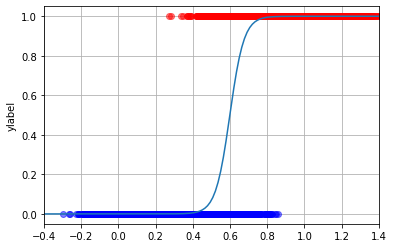

In [9]:
# 識別境界があっていそうか，２次元にプロットして表示してみなさい
plt.plot(x[y==0],y[y==0],'bo',alpha=0.5)
plt.plot(x[y==1],y[y==1],'ro',alpha=0.5)
plt.ylabel('ylabel')
plt.grid()
plt.xlim(-0.4,1.4)
xx = np.linspace(-0.4,1.4,128)
yy = 1/(1+np.exp(-(w1*xx+w0)))
plt.plot(xx,yy)

## 考察
演習の回答と照らして工夫したところがあれば，箇条書きで良いので以下にアピールしてください． 例: パラメータを初期値から変えてみた，epoch数を増やしてみたなど
epochs=1024ではほぼ直線だった。
epochs=8192にしたところ、結構はっきりと収束しているような遷移になった。しかし、どの値に収束しているかはよくわからない結果となった。
epochs=16284にしたところ、収束しているように見えるようになった。しかし、どのような値に収束しているのかはよくわからなかった。それと、二値の境界線が0.5から0.6あたりにあるということもわかった。また、ロジスティック関数で描写したグラフと同じような外形になった。
epoch数を512に減らして、点の個数を1000,10000としたら若干収束しているような外形にはなったが、どのような値に収束しているのかはわからなかったし、それほど元の形から変化しているようには見えなかった。そこで、点の個数を50000にしたところ、epoch数=16284よりも収束した。そして二値の境界線が0.6であるということが、よりはっきりとわかるようになった。ただ、実行が終了するのに10分くらいかかった。以上より、こんなに簡単な問題でさえ収束させるのに5万データも必要となるのだから、一般的な機械学習では何十、何百万という学習用のデータが必要になるのだと考えられる。しかも、今回は2値分類なので比較的簡単な機械学習になっているのだと考えられる。実際の機械学習では、2値分類をするような機会はほとんどないはずなので、もっと時間も掛かるのだと考えられる。